# Case Study: Credit Card Clustering
# Description: Credit card clustering is the task of grouping credit card holders based on their buying habits, credit limits, and many other financial factors.
# It is also known as credit card segmentation. Such clustering analysis helps businesses find their potential customers and many more marketing strategies.
# Here is a dataset based on customer segmentation: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata
## 1.CUST_ID: Unique identification number of the customer
## 2.BALANCE: Balance in the bank account of the customer
## 3.BALANCE_FREQUENCY: How frequently the balance is updated in the account of the customer (1 means frequently updated, and 0 means not frequently updated)
## 4.PURCHASES: The number of purchases made by the customer
## 5.ONEOFF_PURCHASES: Maximum amount of one-time purchase
## 6.INSTALLMENTS_PURCHASES: Amount of purchases on instalments
## 7.CASH_ADVANCE: Cash in advance paid by the customer
## 8.PURCHASES_FREQUENCY: The frequency of purchases (1 means high frequency, 0 means low frequency)
## 9.ONEOFF_PURCHASES_FREQUENCY: The frequency of one-time payment purchases (1 means high frequency, 0 means low frequency)
## 10.PURCHASES_INSTALLMENTS_FREQUENCY: The frequency of purchases on instalments (1 means high frequency, 0 means low frequency)
## 11.CASH_ADVANCE_FREQUENCY: Frequency of cash in advance payments
## 12.CASH_ADVANCE_TRX: Number of cash in advance transactions
## 13.PURCHASES_TRX: Number of transactions on purchases
## 14.CREDIT_LIMIT: Credit limit of the customer
## 15.PAYMENTS: Amount of payments made by the customer
## 16.MINIMUM_PAYMENTS: Amount of minimum payments made by the customer
## 17.PRC_FULL_PAYMENT: Percentage of full payment made by the customer
## 18.TENURE: The tenure of the credit card service of the customer

# Problem Statement: The problem aims to group credit card customers based on their buying habits, credit limit, and other characteristics of the customers.

# Import the Packages

In [298]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import cluster
from warnings import simplefilter


# Load the data into dataframe

In [324]:
df = pd.read_csv(r'C:\Users\kgupta\Downloads\CC GENERAL.csv')

In [325]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [326]:
# Check for NAN values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [327]:
# Summary Statistics
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [328]:
# Check for duplicates
df.duplicated().sum()

0

# Drop the Null values from dataframe

In [329]:
df.dropna(inplace = True)

In [330]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Drop the unwanted rows and use only features which are relevant for analysis and which helps in grouping the customer 

In [331]:
new_df = df[['BALANCE','PURCHASES','CREDIT_LIMIT']]

In [332]:
new_df.head(10)

,BALANCE,PURCHASES,CREDIT_LIMIT
0,40.900749,95.40,1000.0
1,3202.467416,0.00,7000.0
2,2495.148862,773.17,7500.0
4,817.714335,16.00,1200.0
5,1809.828751,1333.28,1800.0
6,627.260806,7091.01,13500.0
7,1823.652743,436.20,2300.0
8,1014.926473,861.49,7000.0
9,152.225975,1281.60,11000.0
10,1293.124939,920.12,1200.0


# Scale the data

In [333]:
X = new_df
X_scaled = preprocessing.RobustScaler().fit_transform(X)

In [334]:
X_scaled

array([[-0.44757775, -0.25394688, -0.40816327],
       [ 1.1678561 , -0.34046866,  0.81632653],
       [ 0.80644467,  0.36074777,  0.91836735],
       ...,
       [-0.45652061, -0.20950697, -0.40816327],
       [-0.46160012, -0.34046866, -0.51020408],
       [-0.2780375 ,  0.65104014, -0.36734694]])

# Create a function to decide the best number of clusters

In [335]:
simplefilter(action='ignore',category=FutureWarning)

num_cluster = [i for i in range(2,11)]
def kmeans_clusters(num_cluster, x_vals):
    inertia = []
    for num in num_cluster:
        kms = cluster.KMeans(n_clusters = num, random_state = 42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
        print(kms.labels_)
    return inertia

inertia = kmeans_clusters(num_cluster,X_scaled)

[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
[3 0 3 ... 3 3 3]
[0 2 0 ... 0 0 0]
[2 3 0 ... 2 2 2]
[3 6 6 ... 3 3 3]
[5 2 2 ... 5 5 5]
[7 2 2 ... 7 7 7]
[0 5 5 ... 0 0 0]


In [336]:
inertia


[30508.207520868524,
 21521.43373119035,
 15122.342859200575,
 11793.737475830329,
 10307.386819971825,
 9002.910250254427,
 8036.747987816961,
 7204.810619854224,
 6551.412224116707]

Text(0, 0.5, 'Inertia')

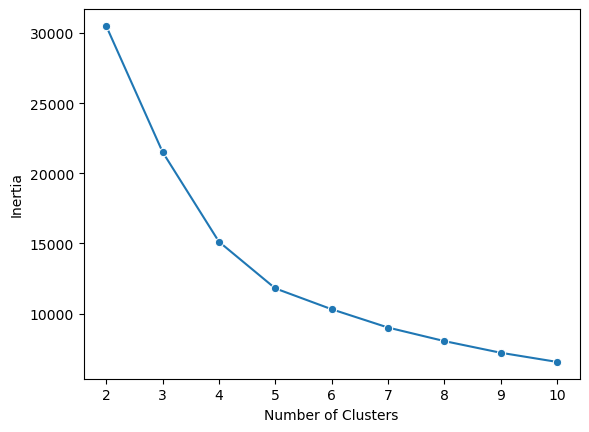

In [337]:
# Create a line plot that shows the relationship between num_clusters and inertia

plot = sns.lineplot(x = num_cluster, y = inertia, marker = 'o')
plot.set_xlabel('Number of Clusters')
plot.set_ylabel('Inertia')

# The plot seems to depict an elbow at five clusters, but there isn't a clear method for confirming that a five-cluster model is optimal. Therefore, the silhouette scores should be checked.

# Silhouette Scores is an evaluating metric to check the quality of clustering results. A general rule of thumb is that a silhouette score above 0.5 indicates a good clustering, a silhouette score below 0.25 indicates a bad clustering, and a silhouette score between 0.25 and 0.5 indicates a fair clustering.

In [338]:
def kmeans_sil(num_cluster, x_vals):
    sil_score = []
    for num in num_cluster:
        kms = cluster.KMeans(n_clusters = num, random_state = 42)
        kms.fit(x_vals)
        sil_score.append(metrics.silhouette_score(x_vals,kms.labels_))
    return sil_score

sil_score = kmeans_sil(num_cluster, X_scaled)

In [339]:
sil_score

[0.7633475905152871,
 0.6262081672946967,
 0.528551076340343,
 0.5126100516764983,
 0.4189254603021277,
 0.41105882046104686,
 0.40241207797445727,
 0.40300604343035357,
 0.40742759425162933]

Text(0, 0.5, 'sil_score')

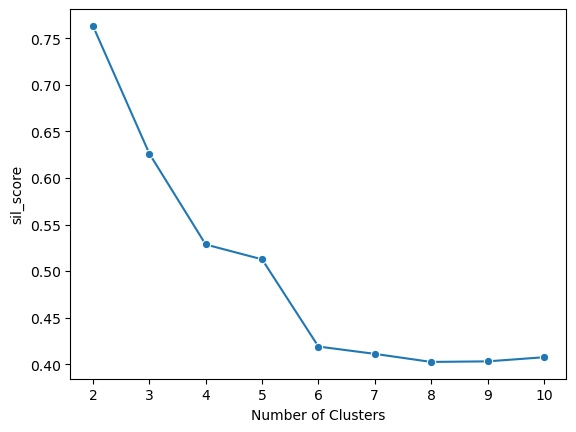

In [340]:
# Create a line plot that shows the relationship between num_clusters and silhouette score

plot = sns.lineplot(x = num_cluster, y = sil_score, marker = 'o')
plot.set_xlabel('Number of Clusters')
plot.set_ylabel('sil_score')

# Higher the Value of Silhouette Score indicates data points are well clustered. Here we believe in 4th cluster the value decrease then it again increase in 5th cluster therefore value we are taking is 5.

In [342]:
# Lets fit the Model in cluster = 5

kms5 = cluster.KMeans(n_clusters = 5, random_state = 42)
kms5.fit_predict(X_scaled)

array([0, 2, 0, ..., 0, 0, 0])

In [343]:
print('Unique values are :', np.unique(kms5.labels_))

Unique values are : [0 1 2 3 4]


In [344]:
# Create a new column and assign the cluster
df['cluster'] = kms5.labels_

In [345]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.00,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.00,0,3,11000.0,1164.770591,100.302262,0.000000,12,4
10,C10011,1293.124939,1.000000,920.12,0.00,920.12,0.000000,1.000000,0.000000,1.000000,0.00,0,12,1200.0,1083.301007,2172.697765,0.000000,12,0


In [346]:
df['cluster'] = df['cluster'].map({0:'Cluster 1',1:'Cluster 2',2:'Cluster 3',3:'Cluster 4', 4:'Cluster 5' })

In [347]:
df.rename(columns = {'cluster': 'CREDIT_CARD_SEGMENTS'}, inplace = True)

In [348]:
df['CREDIT_CARD_SEGMENTS'].head(10)

0     Cluster 1
1     Cluster 3
2     Cluster 1
4     Cluster 1
5     Cluster 1
6     Cluster 2
7     Cluster 1
8     Cluster 1
9     Cluster 5
10    Cluster 1
Name: CREDIT_CARD_SEGMENTS, dtype: object

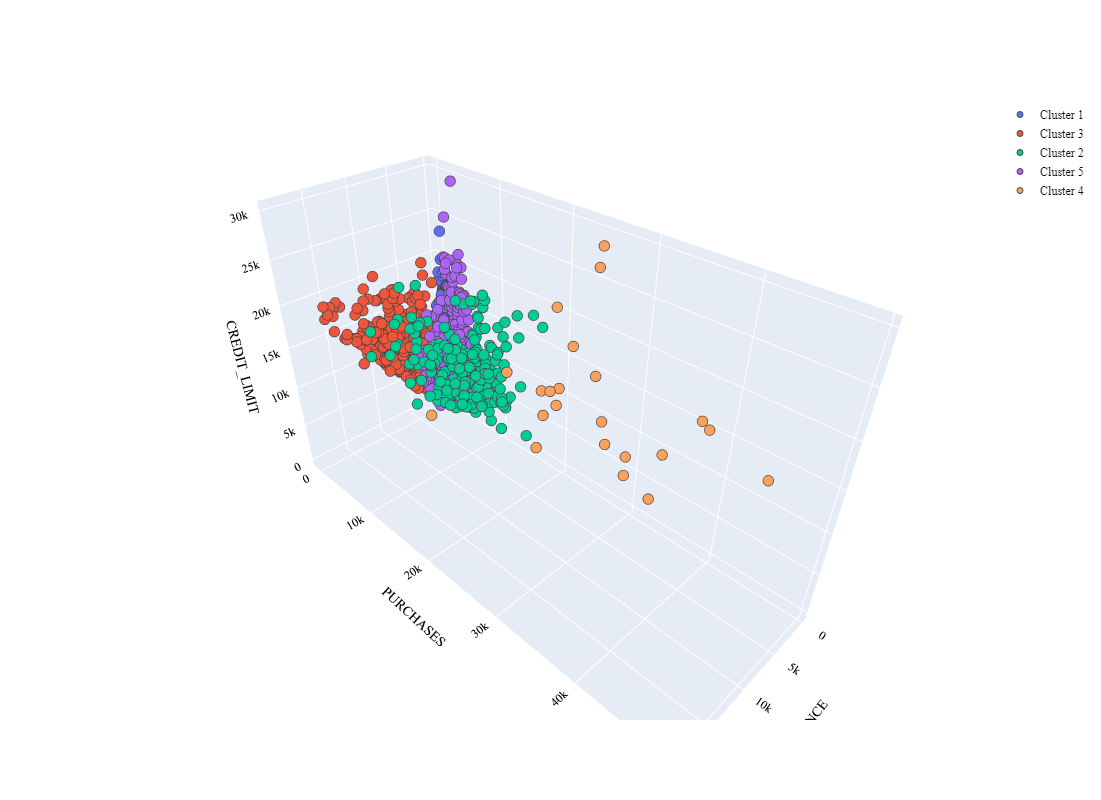

In [349]:
import plotly.graph_objects as go
Plot = go.Figure()
for i in list(df["CREDIT_CARD_SEGMENTS"].unique()):
    Plot.add_trace(go.Scatter3d(x = df[df["CREDIT_CARD_SEGMENTS"] == i]['BALANCE'],
                                y = df[df["CREDIT_CARD_SEGMENTS"] == i]['PURCHASES'],
                                z = df[df["CREDIT_CARD_SEGMENTS"] == i]['CREDIT_LIMIT'],
                                mode ='markers', marker_size = 6, marker_line_width = 1,
                                name = str(i)))
Plot.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES: %{y} <br>CREDIT_LIMIT: %{z}')

Plot.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'BALANCE', titlefont_color = 'black'),
                                yaxis=dict(title = 'PURCHASES', titlefont_color = 'black'),
                                zaxis=dict(title = 'CREDIT_LIMIT', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color = 'black', size = 12))
                   
                            
    